## Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import os
import tifffile
from sklearn.cluster import KMeans

In [2]:
def get_simplastic_v1():
    path = 'data/Mytilene/simplastic_v1'
    path_patchM1 = path +'/M1'+'/patch'
    path_labelM1 = path +'/M1'+'/label'

    path_patchM2 = path +'/M2'+'/patch'
    path_labelM2 = path +'/M2'+'/label'

    sizeM1 = len(os.listdir(path +'/M1'+'/patch'))
    sizeM2 = len(os.listdir(path +'/M2'+'/patch'))

    patch_list = []
    label_list = []


    for i in range(sizeM1):
        patch = tifffile.imread(path_patchM1 + '/patch_{}_{}.tif'.format('M1',i))
        label = tifffile.imread(path_labelM1 + '/label_{}_{}.tif'.format('M1',i))
        patch_list.append(patch)
        label_list.append(label)

    for i in range(sizeM2):
        patch = tifffile.imread(path_patchM2 + '/patch_{}_{}.tif'.format('M2',i))
        label = tifffile.imread(path_labelM2 + '/label_{}_{}.tif'.format('M2',i))
        patch_list.append(patch)
        label_list.append(label)

    return patch_list, label_list

In [3]:
patch_list, label_list = get_simplastic_v1()

In [4]:
print(len(patch_list))
print(patch_list[0].shape)

print(len(label_list))
print(label_list[0].shape)

68
(60, 70, 12)
68
(60, 70)


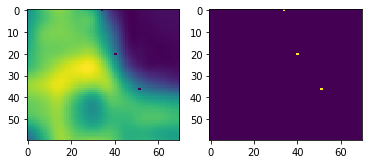

In [5]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(patch_list[0][:,:,0])
plt.subplot(1,2,2)
plt.imshow(label_list[0][:,:])
plt.show()

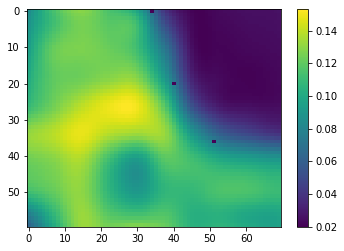

In [6]:
plt.imshow(patch_list[0][:,:,0])
plt.colorbar()

In [7]:
X = patch_list[0][:,:,0]
np.histogram(X.flatten(), bins=10)

(array([ 751,  135,  111,  104,  126,  338,  802, 1007,  554,  272]),
 array([0.02   , 0.03331, 0.04662, 0.05993, 0.07324, 0.08655, 0.09986,
        0.11317, 0.12648, 0.13979, 0.1531 ]))

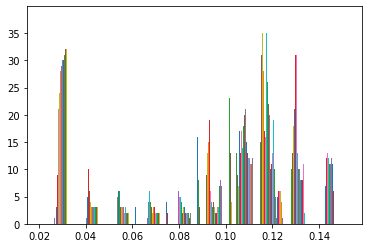

In [8]:
plt.hist(X, bins=10)
plt.show()

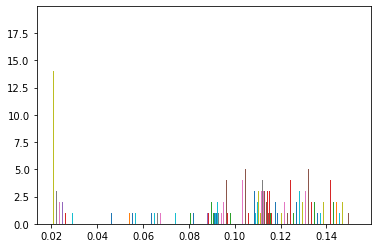

In [9]:
plt.hist(X, bins=100)
plt.show()

In [124]:
# import the images
def get_tiles_as_array(folder):
    band_list = ['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11','B12']
    path = 'data/'+ folder
    folder_list = os.listdir(path)
    m,n = 600,1400
    array = np.zeros((m,n,len(band_list)))

    i = 0
    for band in band_list:
        for wanted_band in folder_list:
            if band in wanted_band:
                print(wanted_band)
                img = tifffile.imread(os.path.join(path,wanted_band))
                array[:,:,i] = img[:m,:n]
                i+=1
    return array
    #for band in folder_list:
    #    for wanted_band in band_list:
    #        if wanted_band in band:
    #            print(band)
    #            img = tifffile.imread(os.path.join(path,band))
    #            array[:,:,i] = img[:m,:n]
    #            i+=1
    #return array

In [125]:
arrayM1 = get_tiles_as_array('Mytilene/M1')
#arrayM2 = get_tiles_as_array('Mytilene/M2')

2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B01_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B02_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B03_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B04_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B05_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B06_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B07_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B08_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B8A_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B09_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B11_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B12_(Raw).tiff


<function matplotlib.pyplot.show(*args, **kw)>

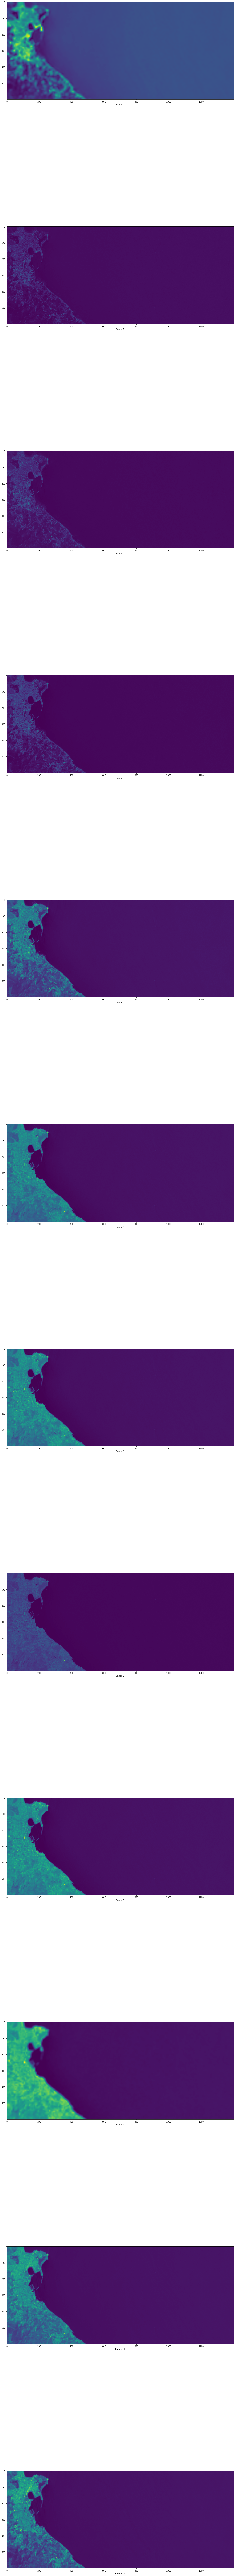

In [127]:
plt.figure(figsize=(20,20*arrayM1.shape[2]))
for i in range(0,arrayM1.shape[2]):
    plt.subplot(arrayM1.shape[2],1,i+1)
    plt.imshow(arrayM1[:,:,i])
    plt.xlabel(f'Bande {i}')
plt.show

In [128]:
print(arrayM1.shape)

(600, 1400, 12)


In [129]:
def kmeans(array, nb_clust):
    m,n = array.shape[0],array.shape[1]
    if len(array.shape)==2:
        X = array.flatten().reshape(-1, 1)
    elif len(array.shape)>2:
        array_flat = np.array([array[:,:,i].flatten() for i in range(array.shape[2])])
        X=(np.transpose(array_flat))
    kmeans = KMeans(n_clusters=nb_clust,  init='k-means++', n_init=10, max_iter=300).fit(X)
    labels=kmeans.labels_
    img_labels = labels.reshape(m,n)
    return img_labels

In [130]:
img_labelsM1 = kmeans(arrayM1,2)

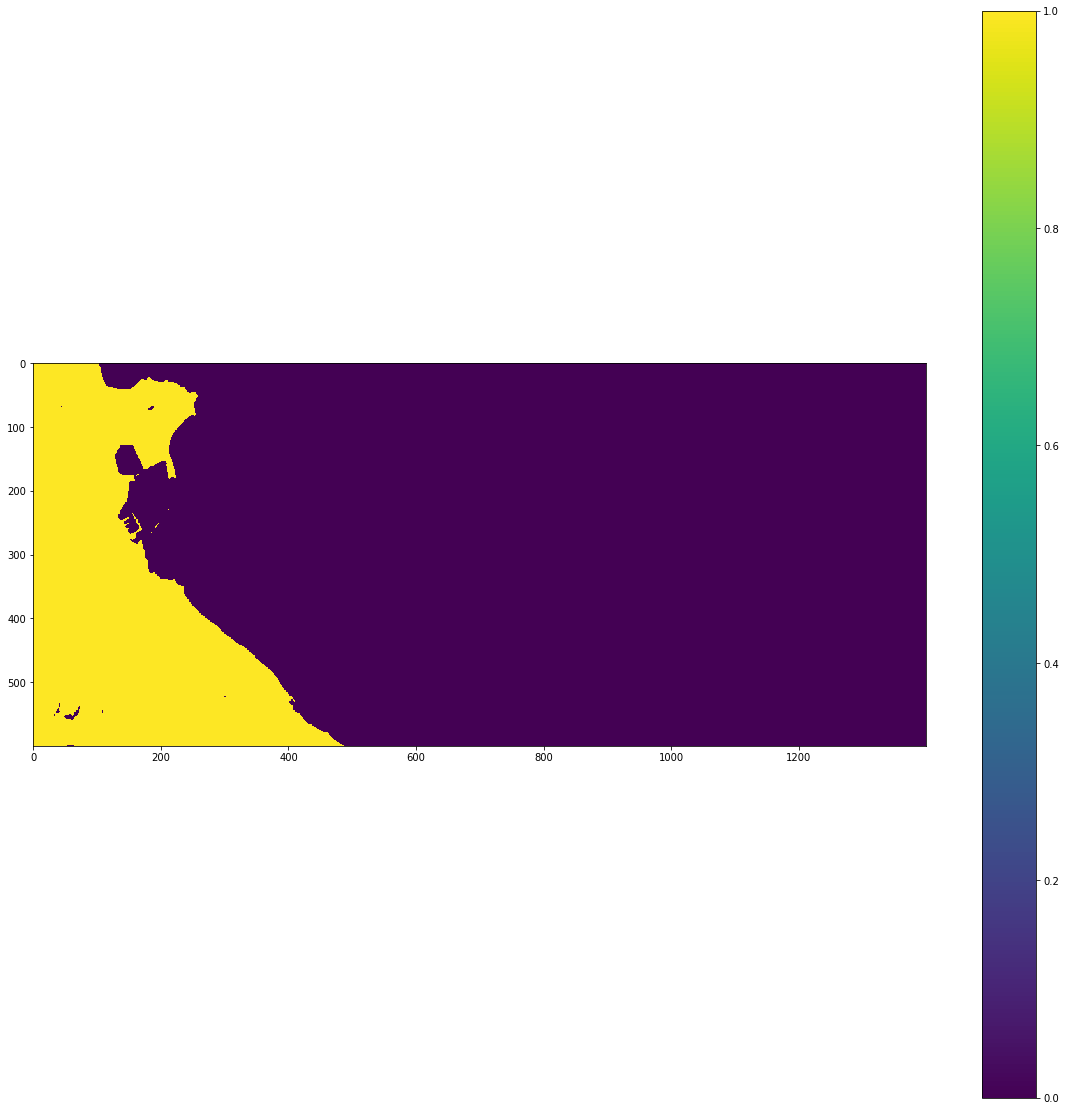

In [131]:
plt.figure(figsize=(20,20))
plt.imshow(img_labelsM1)
plt.colorbar()
plt.show()

In [18]:
def elbow_for_fun(X_test, Kmin, Kmax):
    labels, inertia, nb_iter = [], [], []
    for k in range(Kmin,Kmax):
        m,n = X_test.shape[0],X_test.shape[1]
        if len(X_test.shape)==2:
            X = X_test.flatten().reshape(-1, 1)
        elif len(X_test.shape)>2:
            X_flat = np.array([X_test[:,:,i].flatten() for i in range(X_test.shape[2])])
            X=(np.transpose(X_flat))
        kmeans = KMeans(n_clusters=k,  init='k-means++', n_init=10, max_iter=300).fit(X)
        labels.append(kmeans.labels_.reshape(m,n))
        inertia.append(kmeans.inertia_)
        nb_iter.append(kmeans.n_iter_)
    plt.figure()
    plt.plot(range(Kmin,Kmax),inertia, label='Inertia')
    plt.plot(range(Kmin,Kmax),nb_iter, label = 'Iterations')
    plt.xlabel("nb of clusters")
    plt.legend()
    plt.show()
    return labels, inertia, nb_iter

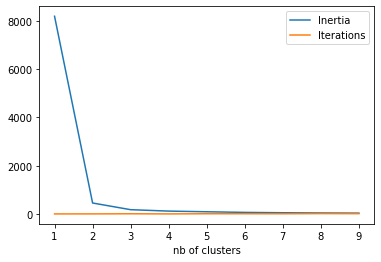

In [19]:
labels, inertia, nb_iter = elbow_for_fun(arrayM1[:,:,0], 1, 10)

<function matplotlib.pyplot.show(*args, **kw)>

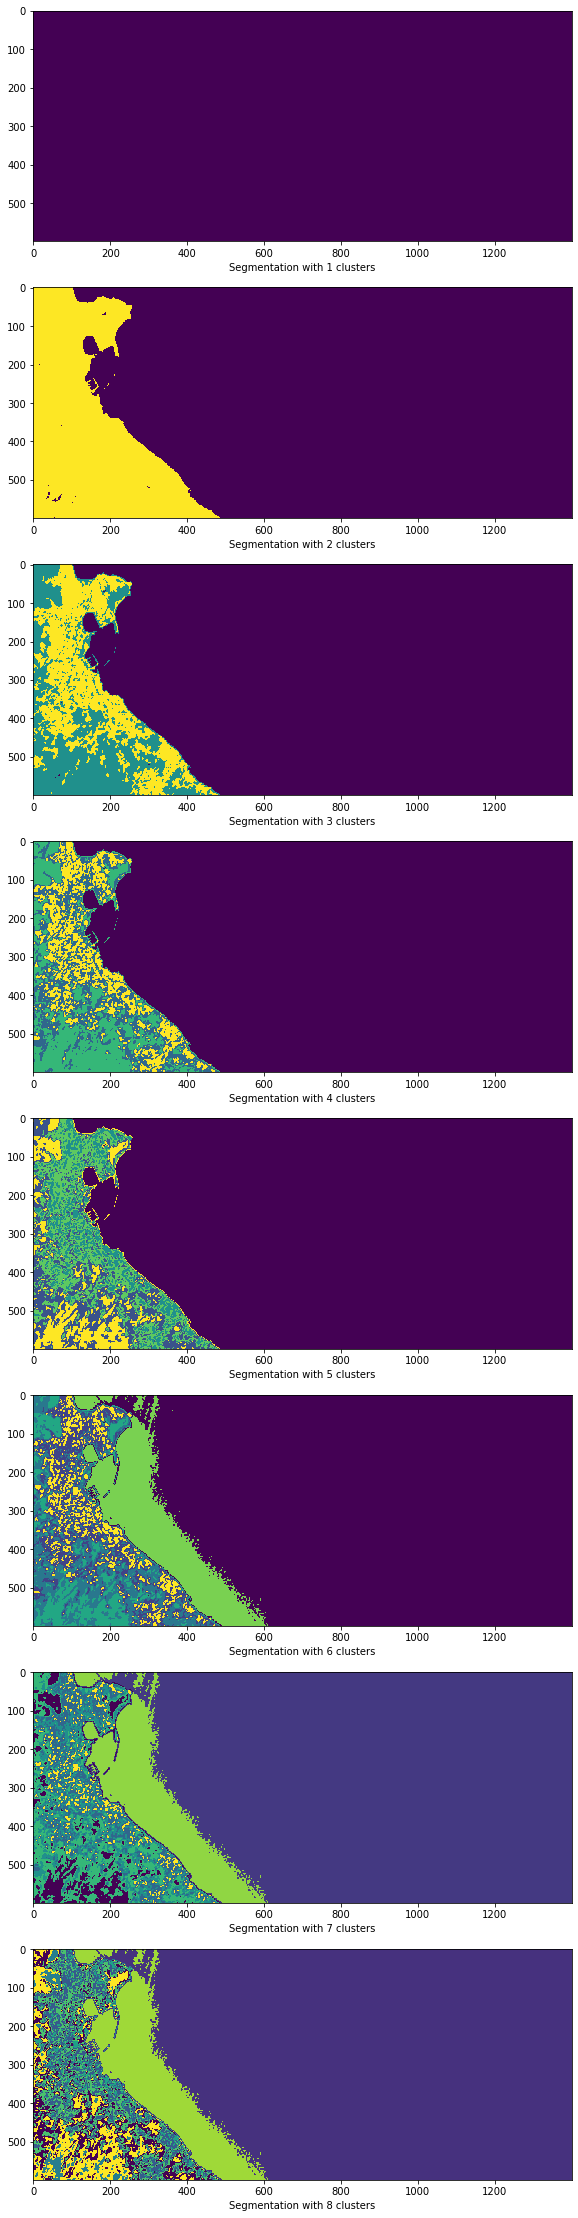

In [20]:
plt.figure(figsize=(10,5*len(labels)))
for i in range(1,len(labels)):
    plt.subplot(len(labels),1,i)
    plt.imshow(labels[i-1])
    plt.xlabel(f"Segmentation with {i} clusters")
plt.show

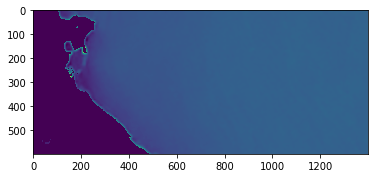

In [233]:
# removing the ground

# change 1 or 0 to relouve the groundn depends on the segmentation results
M1_ocean = arrayM1
M1_ocean[img_labelsM1==1]= np.nan
M1_ocean[img_labelsM1==1]= 0
#for i in range(M1_ocean.shape[2]):
#   M1_ocean[:,:,i][img_labelsM1==1]= 0
X_ocean = M1_ocean[:,:,0]
plt.imshow(X_ocean)

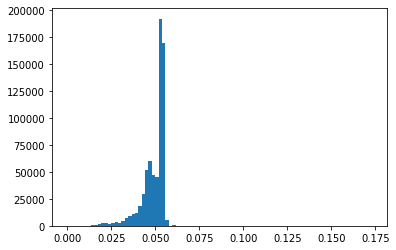

In [234]:
plt.hist(X_ocean.flatten()[X_ocean.flatten()>0], bins=90)
plt.show()

In [235]:
# anomaly detection ... one feature/example (1 sepectral band) ...kinda

# Supposed to choose an non anomalous example, to extract mu and sigma ...
X_train = X_ocean[0:200, 400:1200].flatten()
print(X_train.shape)
mu, sigma = np.nanmean(X_train, axis=0), np.nanstd(X_train, axis= 0) 
print(f'Mean = {mu}, Standard Deviation = {sigma}')

(160000,)
Mean = 0.051404467569454576, Standard Deviation = 0.0028570154007584252


In [236]:
def predict_anomaly(X, mu, sigma, eps):
    p_x = (1 / (np.sqrt(2*np.pi)*sigma)) * np.exp(-np.power((X-mu),2) / (2*sigma**2))
    return ( p_x < eps)

In [237]:
print(X_ocean.shape)

anomaly = predict_anomaly(X_ocean, mu, sigma, 0.1)
anomaly[anomaly==True]=1
anomaly[anomaly==False]=0
print(anomaly.shape)

(600, 1400)
(600, 1400)


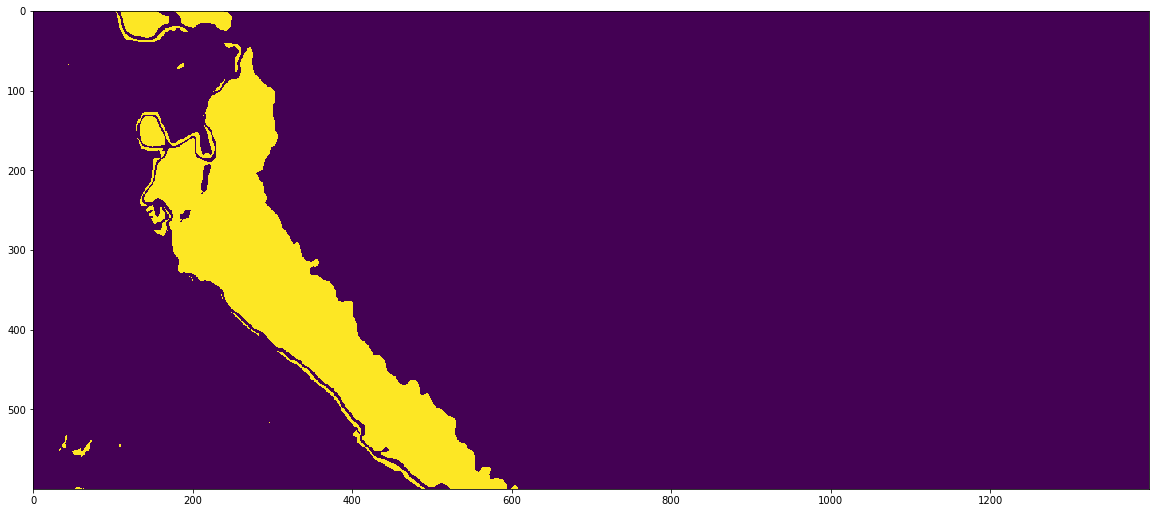

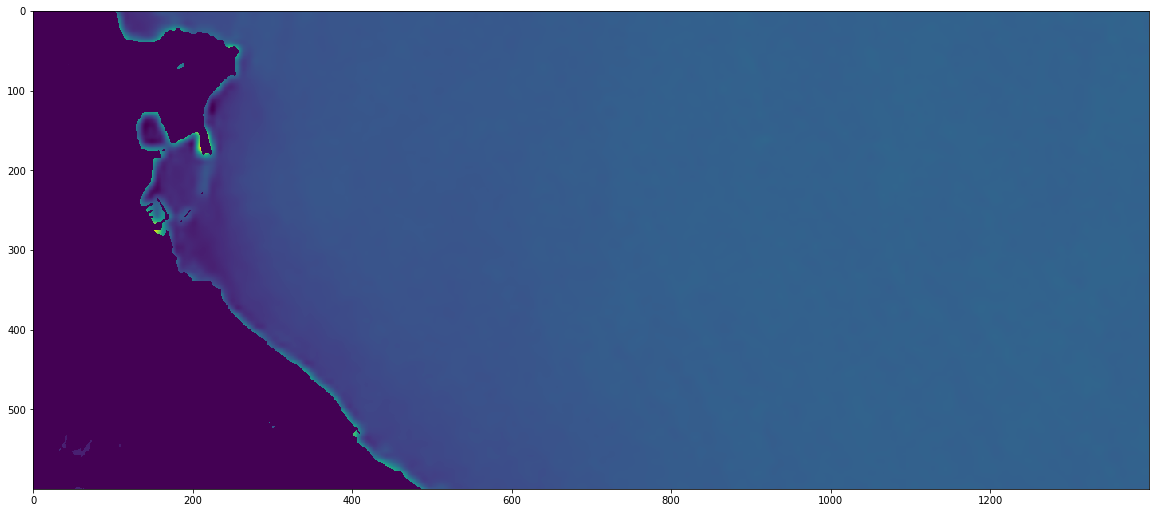

In [238]:
plt.figure(figsize=(20,20))
anomaly[X_ocean==0]= 0
plt.imshow(anomaly)
#plt.colorbar()
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(X_ocean)
plt.show()

In [293]:
# anomaly detection ... multiple features/examples (n sepectral band) ...kinda

# Supposed to choose an non anomalous example, to extract mu and sigma ...
def train_anomaly_multifeature(train_data):
    #print(train_data.shape)
    X_train = np.array([train_data[:,:,i].flatten() for i in range(train_data.shape[2])]).T
    #print(X_train.shape)
    mu, sigma = np.nanmean(X_train, axis=0), np.nanstd(X_train, axis= 0)
    #print(f'Size de mu : {mu.shape}, Size de sigma : {sigma.shape}')
    #for i in range(mu.shape[0]):
    #    print(f'Feature {i}: Mean = {mu[i]}, Standard Deviation = {sigma[i]}')
    return mu, sigma

In [294]:
def predict_anomaly_multifeatures(X, mu, sigma, eps):
    # this method suggest the independance of each feature
    
    m,n,o = X.shape
    X_test = np.array([X[:,:,i].flatten() for i in range(X.shape[2])]).T
    #print(f'Size de mu : {mu.shape}, Size de sigma : {sigma.shape}')
    mu, sigma = mu.reshape(-1,1).T, sigma.reshape(-1,1).T
    #print(f'Size de mu : {mu.shape}, Size de sigma : {sigma.shape}')
    p_x = (np.divide(1,np.sqrt(2*np.pi)*sigma)) * np.exp( np.divide(-np.power((X_test-mu),2),2*np.power(sigma,2)))
    #print(f'p_x.shape = {p_x.shape}')
    anomaly = (np.prod(p_x, axis=1) < eps)
    anomaly[anomaly==True]=1
    anomaly[anomaly==False]=0
    anomaly = anomaly.reshape((m,n))
    return anomaly

In [308]:
train_data = M1_ocean[200:400, 400:1200,:]
mu, sigma = train_anomaly_multifeature(train_data)

anomaly = predict_anomaly_multifeatures(M1_ocean, mu, sigma, 0.5)
#print(anomaly.shape)


(600, 1400)


840000

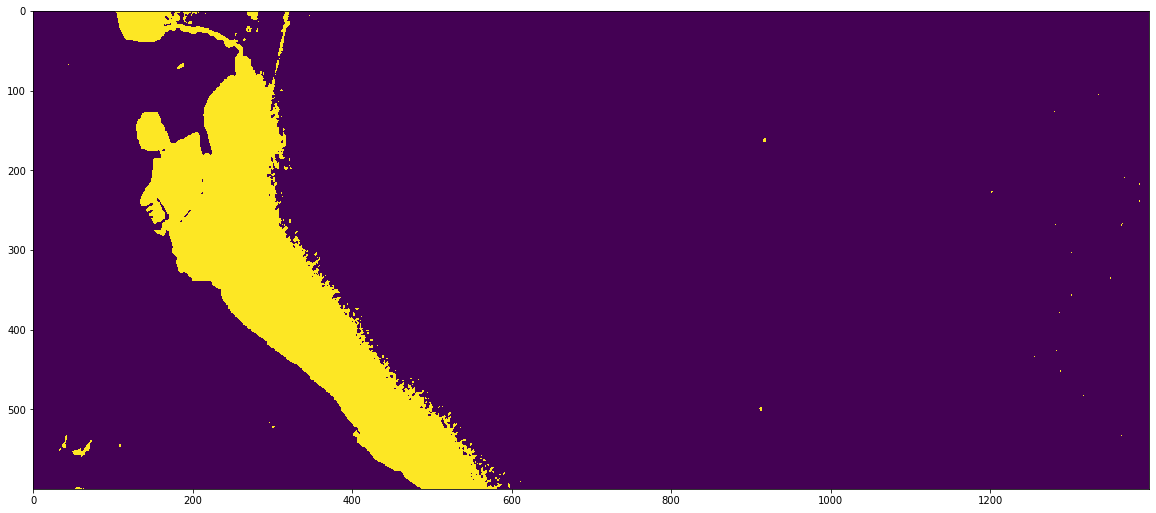

In [296]:
anomaly_without_ground = anomaly
anomaly_without_ground[img_labelsM1==1]= 0
plt.figure(figsize=(20,20))
plt.imshow(anomaly_without_ground)
plt.show()


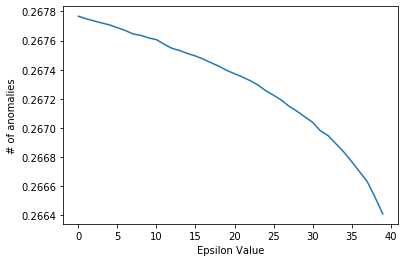

In [314]:
train_data = M1_ocean[200:400, 400:1200,:]
mu, sigma = train_anomaly_multifeature(train_data)

eps = np.linspace(1,0.1,40)
#print(eps)
nb_anomaly = []
for i in range(len(eps)):
    anomaly = predict_anomaly_multifeatures(M1_ocean, mu, sigma, eps[i])
    nb_anomaly.append(np.sum(np.sum(anomaly))/anomaly.size)
#print(nb_anomaly)
plt.plot(nb_anomaly)
plt.xlabel('Epsilon Value')
plt.ylabel('# of anomalies')
plt.show()

In [289]:
M1_ocean_visible_bands = M1_ocean[:,:,[1,2,3,7]]
M1_ocean_visible_bands = M1_ocean_visible_bands/np.linalg.norm(M1_ocean_visible_bands)
train_data = M1_ocean_visible_bands[200:400, 400:1200,:]
print(train_data.shape)
mu, sigma = train_anomaly_multifeature(train_data)

anomaly = predict_anomaly_multifeatures(M1_ocean_visible_bands, mu, sigma, 0.01)

(200, 800, 4)
(200, 800, 4)
(160000, 4)
Size de mu : (4,), Size de sigma : (4,)
Feature 0: Mean = 0.0007817158447471447, Standard Deviation = 5.7143873044901474e-05
Feature 1: Mean = 0.000567044808382607, Standard Deviation = 4.6213268846314276e-05
Feature 2: Mean = 0.0005022246946983646, Standard Deviation = 4.971100309124674e-05
Feature 3: Mean = 0.0005178159871511157, Standard Deviation = 4.8788723849690495e-05


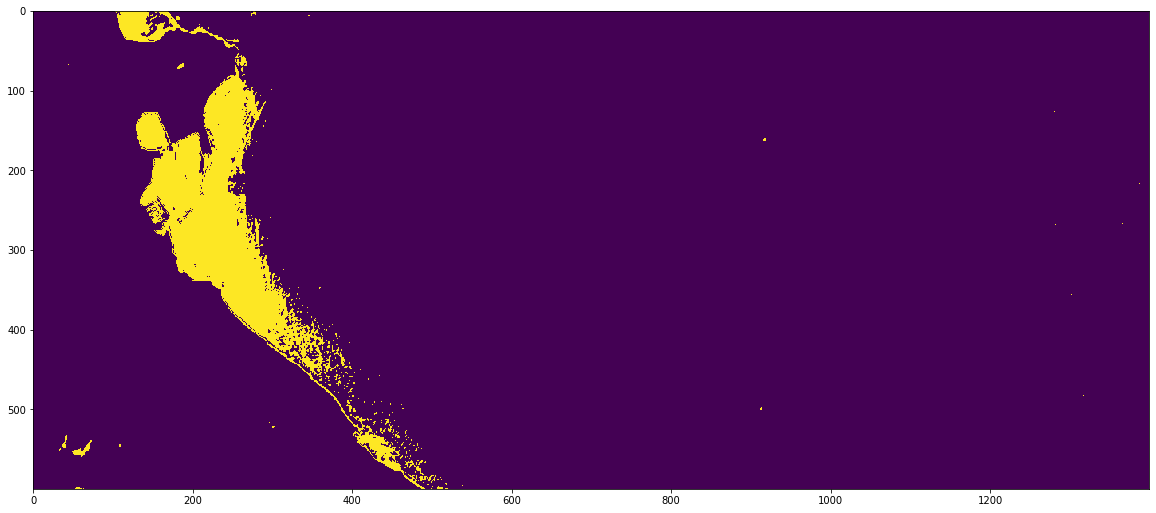

In [290]:
anomaly_without_ground = anomaly
anomaly_without_ground[img_labelsM1==1]= 0
plt.figure(figsize=(20,20))
plt.imshow(anomaly_without_ground)
plt.show()

In [ ]:
# need to compute the multivariate gaussian problem next 
# must have m(examples) >> n(features) otherwise sigma is non invertible

# Supposed to choose an non anomalous example, to extract mu and sigma ...
train_data = M1_ocean[0:200, 400:1200,:]
X_train = np.array([train_data[:,:,i].flatten() for i in range(train_data.shape[2])]).T
print(X_train.shape)
mu = np.nanmean(X_train, axis=0)

# technically works but kills the kernel .... X_train.shape = 160000*12...
sigma_mat = np.nanmean(np.dot(X_train-mu,(X_train-mu).T), axis=0)
# sigma_mat = np.cov(X_train)
print(f'Mean = {mu}, Standard Deviation = {sigma_mat}')

In [ ]:
def predict_anomaly_multivariate(X, mu, sigma, eps):
    # this method suggest the independance of each feature
    n = len(mu)
    X_mu = X-mu
    p_x = ((2*np.pi)**(-n/2))*(np.linalg.det(sigma)**(-0.5))*np.exp(-0.5*np.dot(np.dot(X_mu.T,np.pinv(sigma)),X_mu))
    return ( p_x < eps)